In [1]:
"""
Deep Neural Networks on Not MNIST using Keras
Author: Rowel Atienza
Project: https://github.com/roatienza/Deep-Learning-Experiments
"""
# On command line: python3 mnist_a2j_mlp_keras.py
# Prerequisite: tensorflow 1.0 and keras 2.0
# must run mnist_a2j_2pickle.py first (one-time) to generate the data

from __future__ import print_function

import numpy as np
import pickle
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

start_time = time.time()
def elapsed(sec):
    if sec<60:
        return str(sec) + " sec"
    elif sec<(60*60):
        return str(sec/60) + " min"
    else:
        return str(sec/(60*60)) + " hr"

## use of pickle to speed up loading of data
# pickle_file = open( "mnist_a2j.pickle", "rb" )
# data = pickle.load(pickle_file)
# test_labels = data["test_labels"]
# train_labels = data["all_labels"]
# test_dataset = data["test_dataset"]
# train_dataset = data["all_dataset"]
# del data
# pickle_file.close()

# print("Training size: ", train_dataset.shape)
# print("Training labels: ", train_labels.shape)
# print("Test size: ", test_dataset.shape)
# print("Test labels: ", test_labels.shape)

Using TensorFlow backend.


In [28]:
from get_log_data import read_logs, get_log_traintest,get_digitized_logdata, get_labelized_logdata
x_train, x_test, y_train, y_test, scaler_x, scaler_y=get_log_traintest('phit',True,False)

In [3]:
min(y_train),max(y_train),min(y_test),max(y_test)

(array([0.]), array([1.]), array([0.]), array([1.]))

In [4]:
y_test

array([[0.7401],
       [0.7354],
       [0.7529],
       ...,
       [0.6602],
       [0.6635],
       [0.6871]])

In [20]:
from get_log_data import read_logs, get_log_traintest,get_digitized_logdata, get_labelized_logdata
num_labels =2# train_labels.shape[1]
barrier=0.25
train_dataset, test_dataset, train_labels, test_labels=get_labelized_logdata(num_labels,ref=barrier,LABEL='phit') #LABEL='phit'

image_size = 28
input_size = 7 #image_size*image_size
batch_size = 1028
hidden_units = 1024
learning_rate = 0.5
dropout = 0.8

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))

model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

sgd = SGD(lr=learning_rate) # , decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(train_dataset, train_labels,
          epochs=75,
          batch_size=batch_size, shuffle=False)
score = np.asarray(model.evaluate(test_dataset, test_labels, batch_size=batch_size))*100.0
# Accuracy: 86.0%
print("\nTest accuracy: %.1f%%" % score[1])
print("Elapsed: " , elapsed(time.time() - start_time))

Epoch 1/75
14853/14853 [==============================] - 1s 56us/step - loss: 0.4886 - acc: 0.7689
Epoch 2/75
14853/14853 [==============================] - 0s 31us/step - loss: 0.4629 - acc: 0.7759
Epoch 3/75
14853/14853 [==============================] - 0s 29us/step - loss: 0.3989 - acc: 0.7912
Epoch 4/75
14853/14853 [==============================] - 0s 30us/step - loss: 0.3800 - acc: 0.8027
Epoch 5/75
14853/14853 [==============================] - 0s 30us/step - loss: 0.3661 - acc: 0.8124
Epoch 6/75
14853/14853 [==============================] - 0s 30us/step - loss: 0.3571 - acc: 0.8285: 0s - loss: 0.4587 - acc: 0.7
Epoch 7/75
14853/14853 [==============================] - 0s 30us/step - loss: 0.3529 - acc: 0.8353
Epoch 8/75
14853/14853 [==============================] - 0s 30us/step - loss: 0.3441 - acc: 0.8429
Epoch 9/75
14853/14853 [==============================] - 0s 31us/step - loss: 0.3392 - acc: 0.8494
Epoch 10/75
14853/14853 [==============================] - 1s 44us/ste

In [21]:
model.predict(test_dataset),test_labels
test_pred=np.array([0 if b<0.5 else 1 for a,b in model.predict(test_dataset)])
print(sum(test_labels-test_pred))
count=0
neg_count=0
for a, b in zip(test_labels,test_pred):
    if a==b:
        count +=1
        
    else:
        neg_count +=1
count,neg_count,count+neg_count,count/(count+neg_count)

-53.0


(1784, 103, 1887, 0.9454160042395336)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_labels,test_pred))
print(classification_report(test_labels,test_pred))

[[1549   78]
 [  25  235]]
             precision    recall  f1-score   support

        0.0       0.98      0.95      0.97      1627
        1.0       0.75      0.90      0.82       260

avg / total       0.95      0.95      0.95      1887



In [23]:
Y_train_inv=test_labels
Y_pred_inv=test_pred

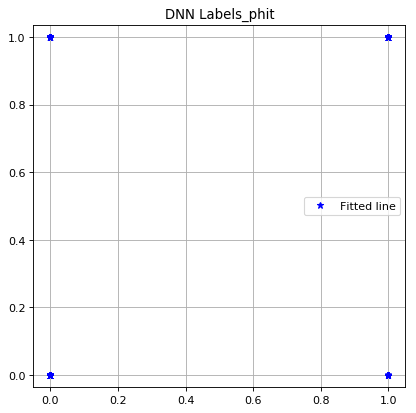

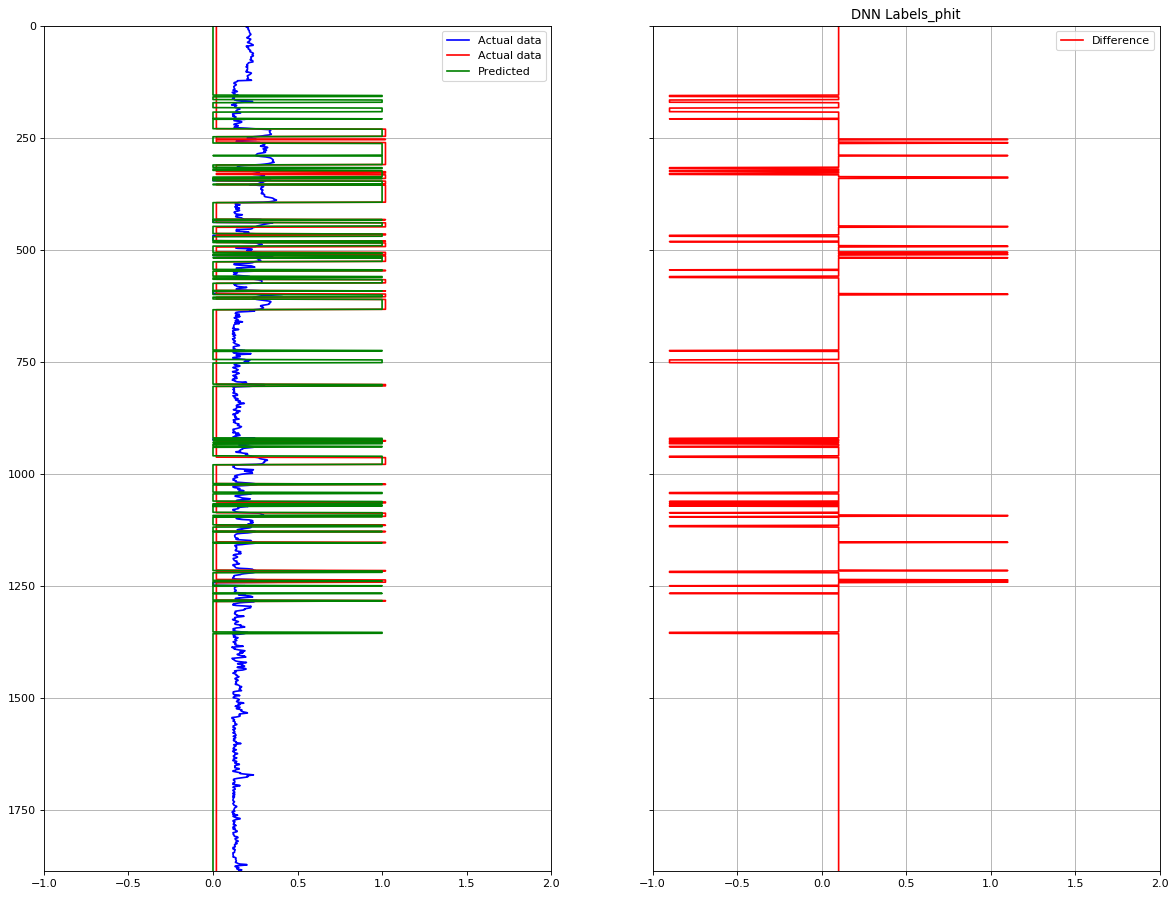

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
imname='DNN Labels_phit'
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi= 80, sharey=True)
# with ax_ as ax1:
ax1.plot(Y_train_inv, Y_pred_inv,'b*', label='Fitted line')
ax1.legend()
ax1.axis('equal')
ax1.grid(True)
plt.title(imname)
plt.show() #5000 epochs, 1024

fig1.savefig(imname+'_scatter.png', dpi=100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred_inv+Y_train_inv)+0.1
for axes in ax:
    if(i==0):
        y_test
        axes.plot( y_test,range(len(y_test)), label="Actual data",color='blue')
        axes.plot( Y_train_inv+0.02,range(len(Y_train_inv)), label="Actual data",color='red')
        axes.plot( Y_pred_inv,range(len(Y_pred_inv)), label="Predicted",color='green')
        axes.set_xlim (-1,2)
    else:
        axes.plot(perc_diff  ,range(len(perc_diff)), label="Difference",color='red')
        axes.set_xlim (-1,2)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train_inv))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)

In [30]:
y_test

array([[0.205394],
       [0.206018],
       [0.204269],
       ...,
       [0.17001 ],
       [0.167507],
       [0.152358]])